In [47]:
import os
import glob
import numpy as np
import netCDF4
import datetime
import cmocean
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 14})
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import logging
coast = cfeature.GSHHSFeature(scale="f")
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

import cmts
from importlib import reload
reload(cmts)
plt.style.use("cmts.mplstyle")

In [2]:
logger = logging.getLogger("Time Series")
logger.setLevel(logging.INFO)
logging.info("Let's start")

### Files and directories

In [15]:
datestart = datetime.datetime(2019, 8, 1)
dateend = datetime.datetime(2019, 8, 31)

## 1. Temperature plots
Plot the temperature measured at the mooring for the month August 2019.

### 1.1 Read the data and select period of interest

In [20]:
datafile = os.path.join(cmts.cmemsdatadir, "GL_TS_MO_6100002.nc")
dates, T, wmocode, _ = get_time_temp(datafile)
gooddates = np.where((dates <= dateend) & (dates >= datestart))[0]

### 1.2 Make the plot

INFO:Time Series:25.799001225386746
INFO:Time Series:21.59900102589745


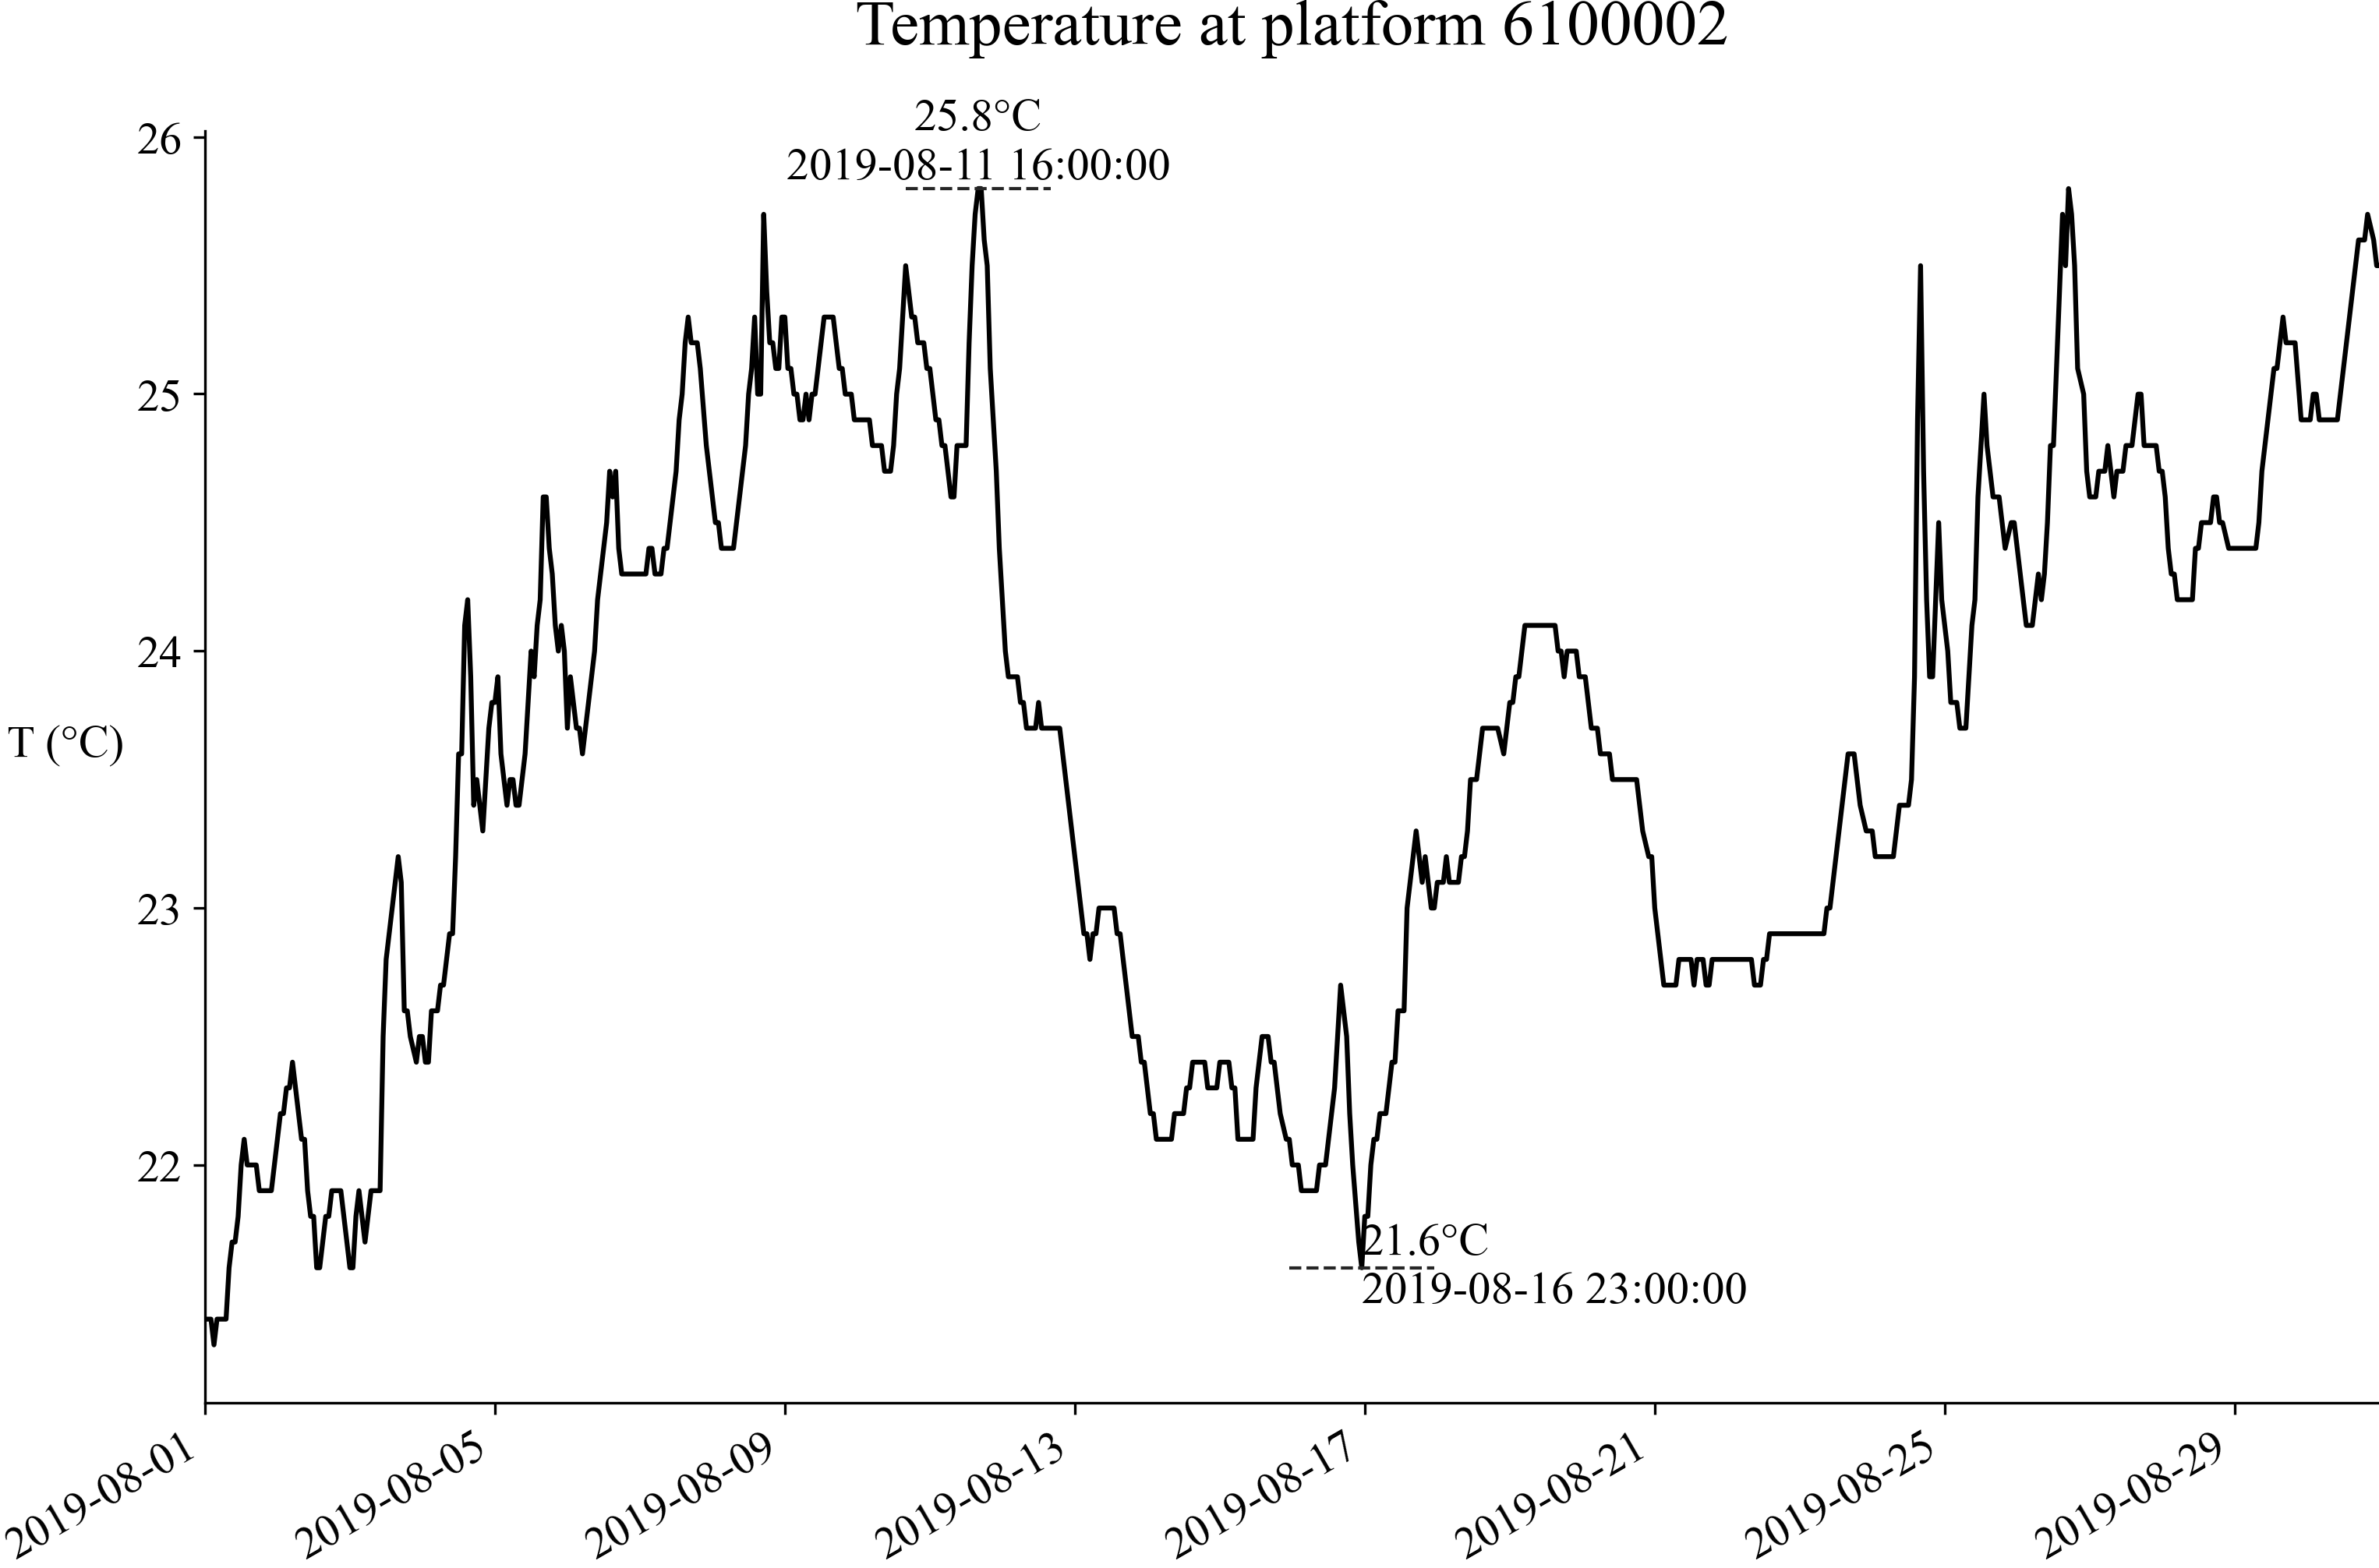

<function matplotlib.pyplot.close(fig=None)>

In [31]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

ax.plot(dates[gooddates], T[gooddates], "k-", lw=1.5)

# Compute and plot local maximum
gooddatesmax = np.where( (dates <= datetime.datetime(2019, 8, 13)) & 
                        (dates >= datetime.datetime(2019, 8, 11)))[0]
Tmax = np.argmax(T[gooddatesmax])
logger.info(T[gooddatesmax][Tmax])
ax.hlines(T[gooddatesmax][Tmax], dates[gooddatesmax][Tmax] - datetime.timedelta(hours=24),
          dates[gooddatesmax][Tmax] + datetime.timedelta(hours=24), color=".15", linestyle="dashed")

ax.text(dates[gooddatesmax][Tmax], T[gooddatesmax][Tmax], 
        f"{str(np.round(T[gooddatesmax][Tmax], 2))}°C\n{dates[gooddatesmax][Tmax]}",
        va="bottom", ha="center")

# Compute and plot local minimum
gooddatesmin = np.where( (dates <= datetime.datetime(2019, 8, 18)) & 
                        (dates >= datetime.datetime(2019, 8, 16)))[0]
Tmin = np.argmin(T[gooddatesmin])
logger.info(T[gooddatesmin][Tmin])
ax.hlines(T[gooddatesmin][Tmin], dates[gooddatesmin][Tmin] - datetime.timedelta(hours=24),
          dates[gooddatesmin][Tmin] + datetime.timedelta(hours=24), color=".15", linestyle="dashed")   

ax.text(dates[gooddatesmin][Tmin], T[gooddatesmin][Tmin], 
        f"{str(np.round(T[gooddatesmin][Tmin], 2))}°C\n{dates[gooddatesmin][Tmin]}",
        va="center", ha="left")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel("T (°C)", rotation=0, ha="right")
ax.set_xlim(datestart, dateend)

plt.title(f"Temperature at platform {wmocode}\n ")

fig.autofmt_xdate()
# plt.savefig(os.path.join(cmts.figdir, f"temperature_mooring_{wmocode}.png"))
plt.show()
plt.close

## 2. Wind

In [35]:
winddatafilelist = glob.glob(os.path.join(cmts.cmemsdatadir, "*.nc"))

['../../data/CMEMS/IR_TS_MO_6100196.nc',
 '../../data/CMEMS/GL_TS_MO_6100002.nc']

### 2.1 Load position from Argo float

In [37]:
argofile = os.path.join(cmts.argodatadir, "GL_PR_PF_6902937_201908.nc")
lonargo, latargo = cmts.load_argo_position(argofile)

### 2.2 Get mean from moorings

INFO:Time Series:Mean latitude: 41.8925895690918°N, mean longitude: 3.6281044483184814°E
INFO:Time Series:Mean latitude: 42.0671272277832°N, mean longitude: 4.670995235443115°E
/home/ctroupin/Software/PythonEnvs/twitter-data/lib/python3.10/site-packages/Cartopy-0.18.0-py3.10-linux-x86_64.egg/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/ctroupin/Software/PythonEnvs/twitter-data/lib/python3.10/site-packages/Cartopy-0.18.0-py3.10-linux-x86_64.egg/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/ctroupin/Software/PythonEnvs/twitter-data/lib/python3.10/site-packag

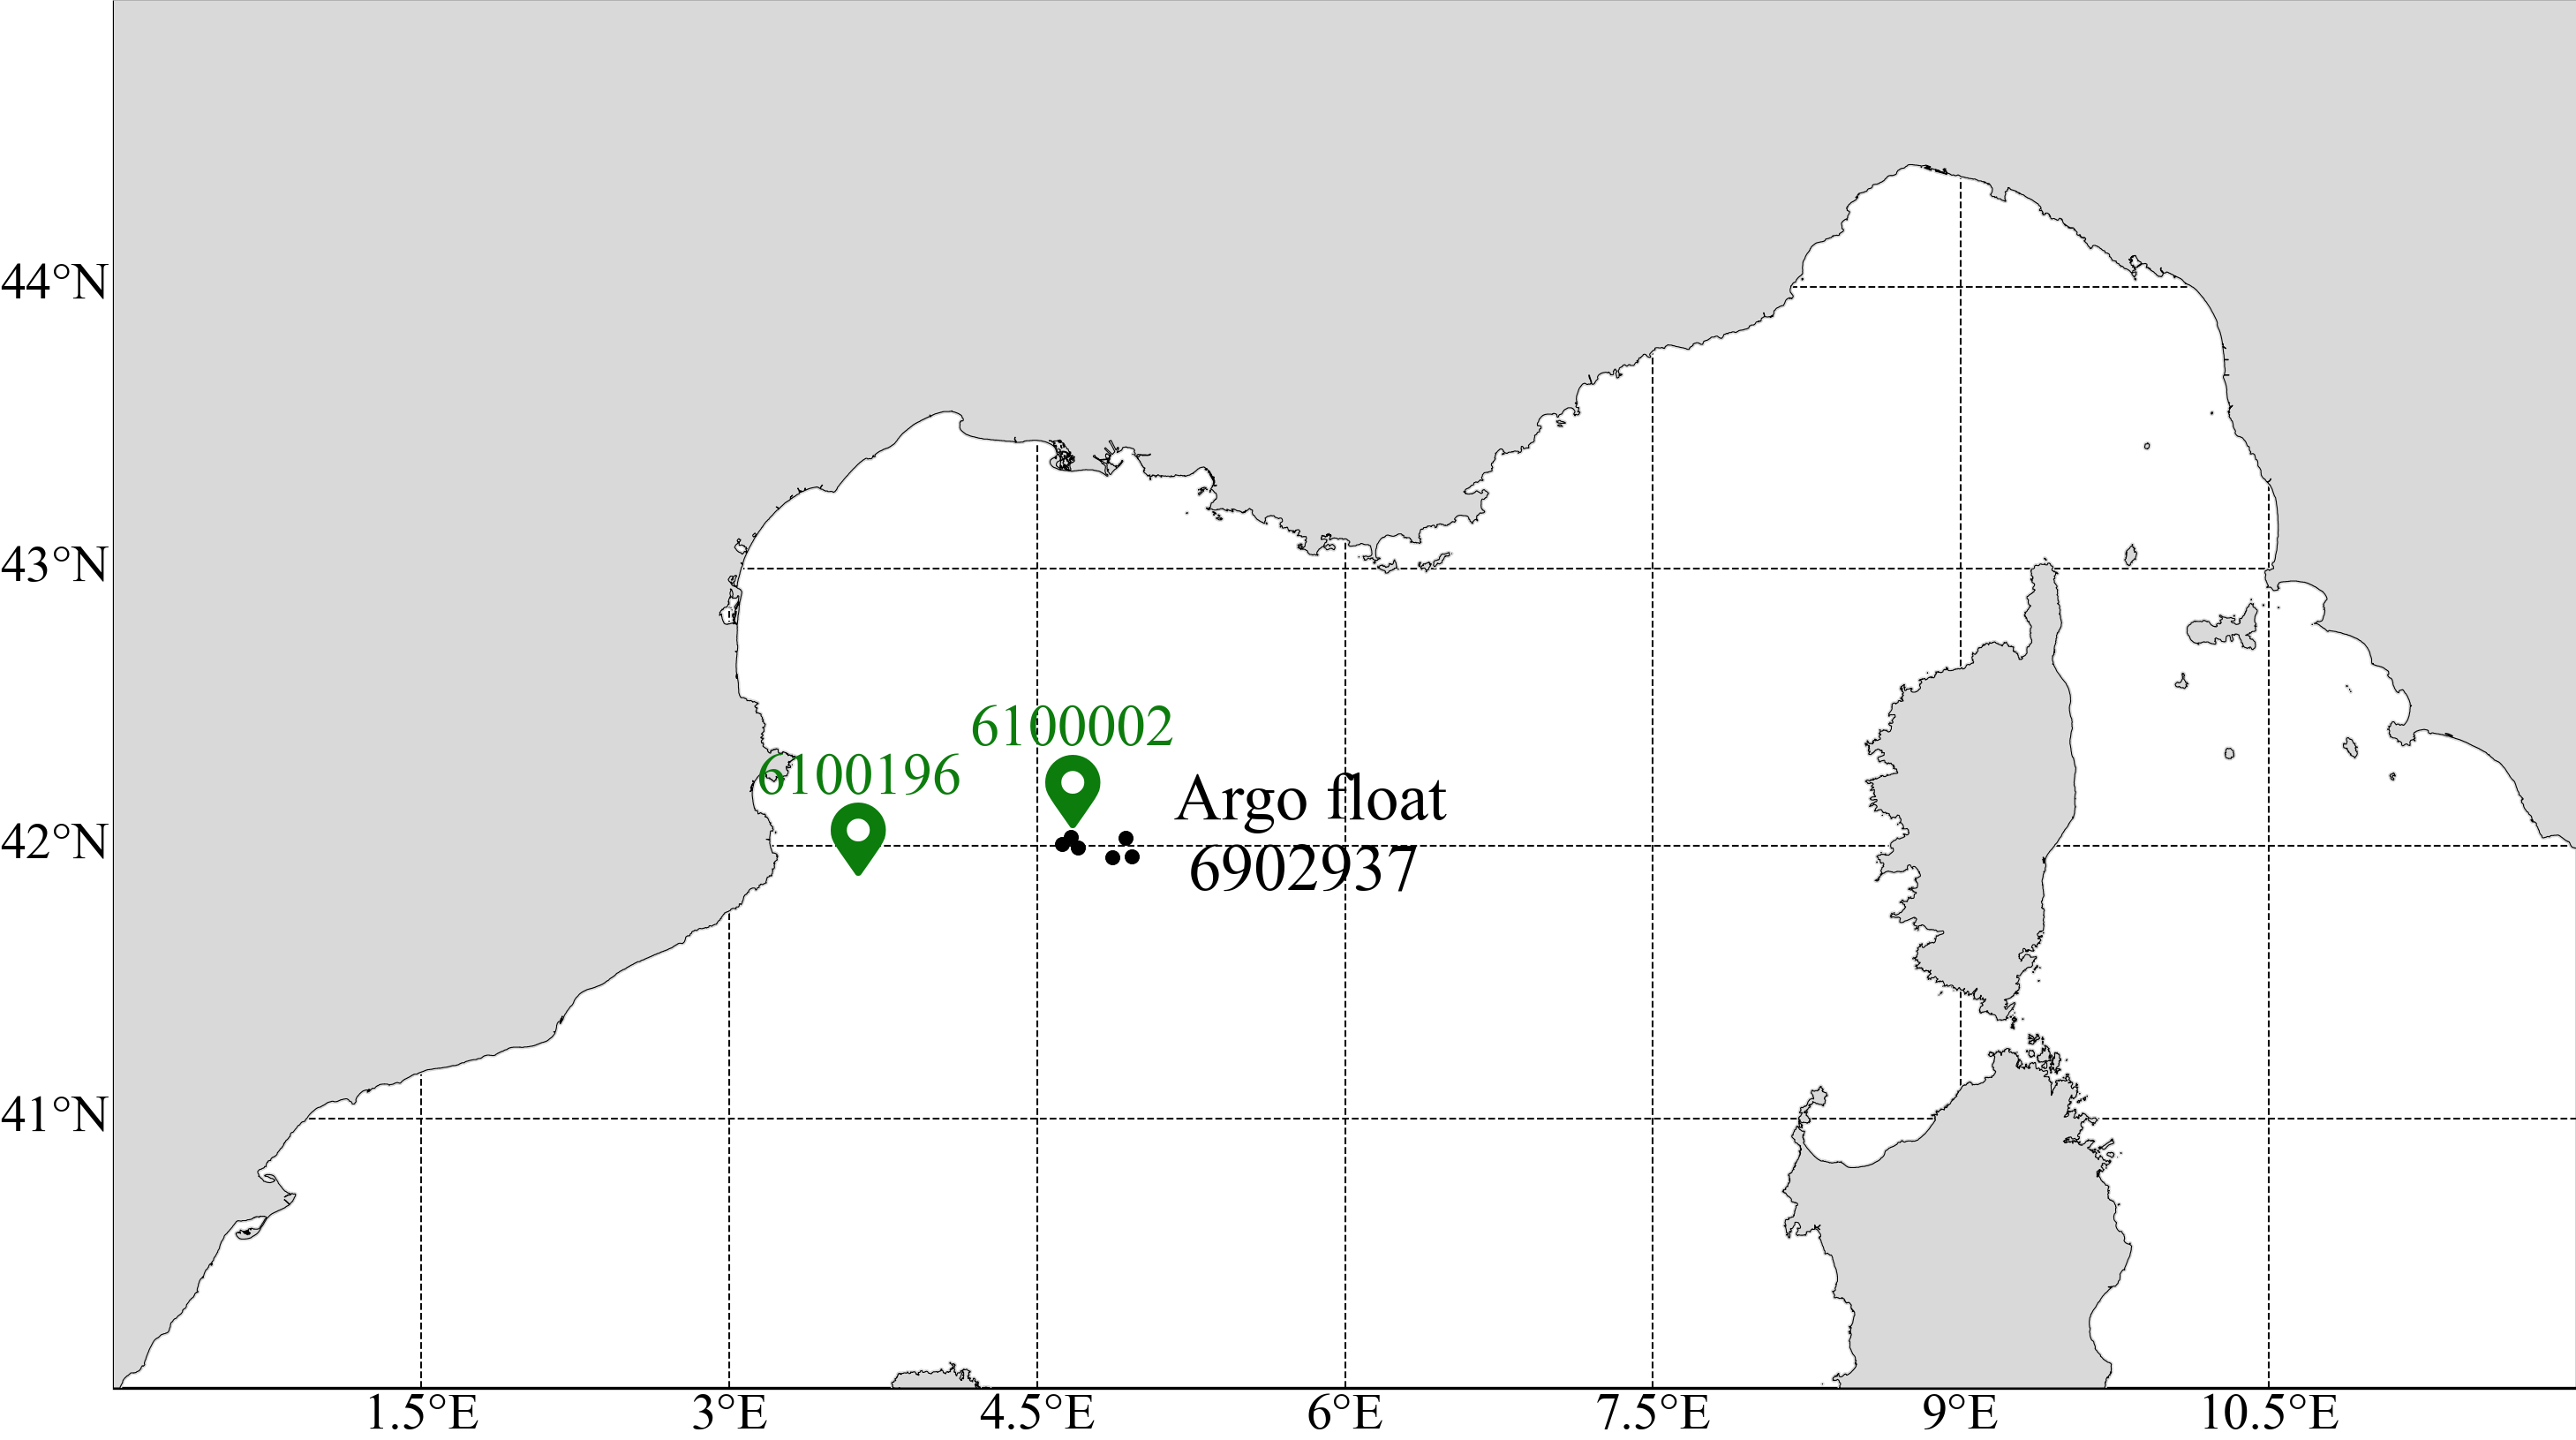

In [46]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=cmts.maincrs)

cmts.decorate_map(ax)

for datafile in winddatafilelist:
    
    lonmean, latmean, wmocode = cmts.get_mean_position(datafile)
    logger.info(f"Mean latitude: {latmean}°N, mean longitude: {lonmean}°E")

    ax.text(lonmean, latmean + 0.3, f"{wmocode}", transform=cmts.datacrs,
            fontsize=16, ha="center", zorder=7, color="#0C7C0D")
    ax.text(lonmean, latmean, "\uf3c5", fontproperties=fp1, transform=cmts.datacrs,
            fontsize=20, ha="center", va="bottom", zorder=7, color="#0C7C0D")
    
ax.plot(lonargo, latargo, "ko", transform=cmts.datacrs, ms=3, zorder=7)
ax.text(5.8, latargo[-1], " Argo float\n6902937", transform=cmts.datacrs, ha="center", va="center", fontsize=18)


plt.savefig(os.path.join(figdir, "mooring_argo_locations"))

plt.show()

### 2.2 Yearly time series

AttributeError: module 'cmts' has no attribute 'read_wind_dates'

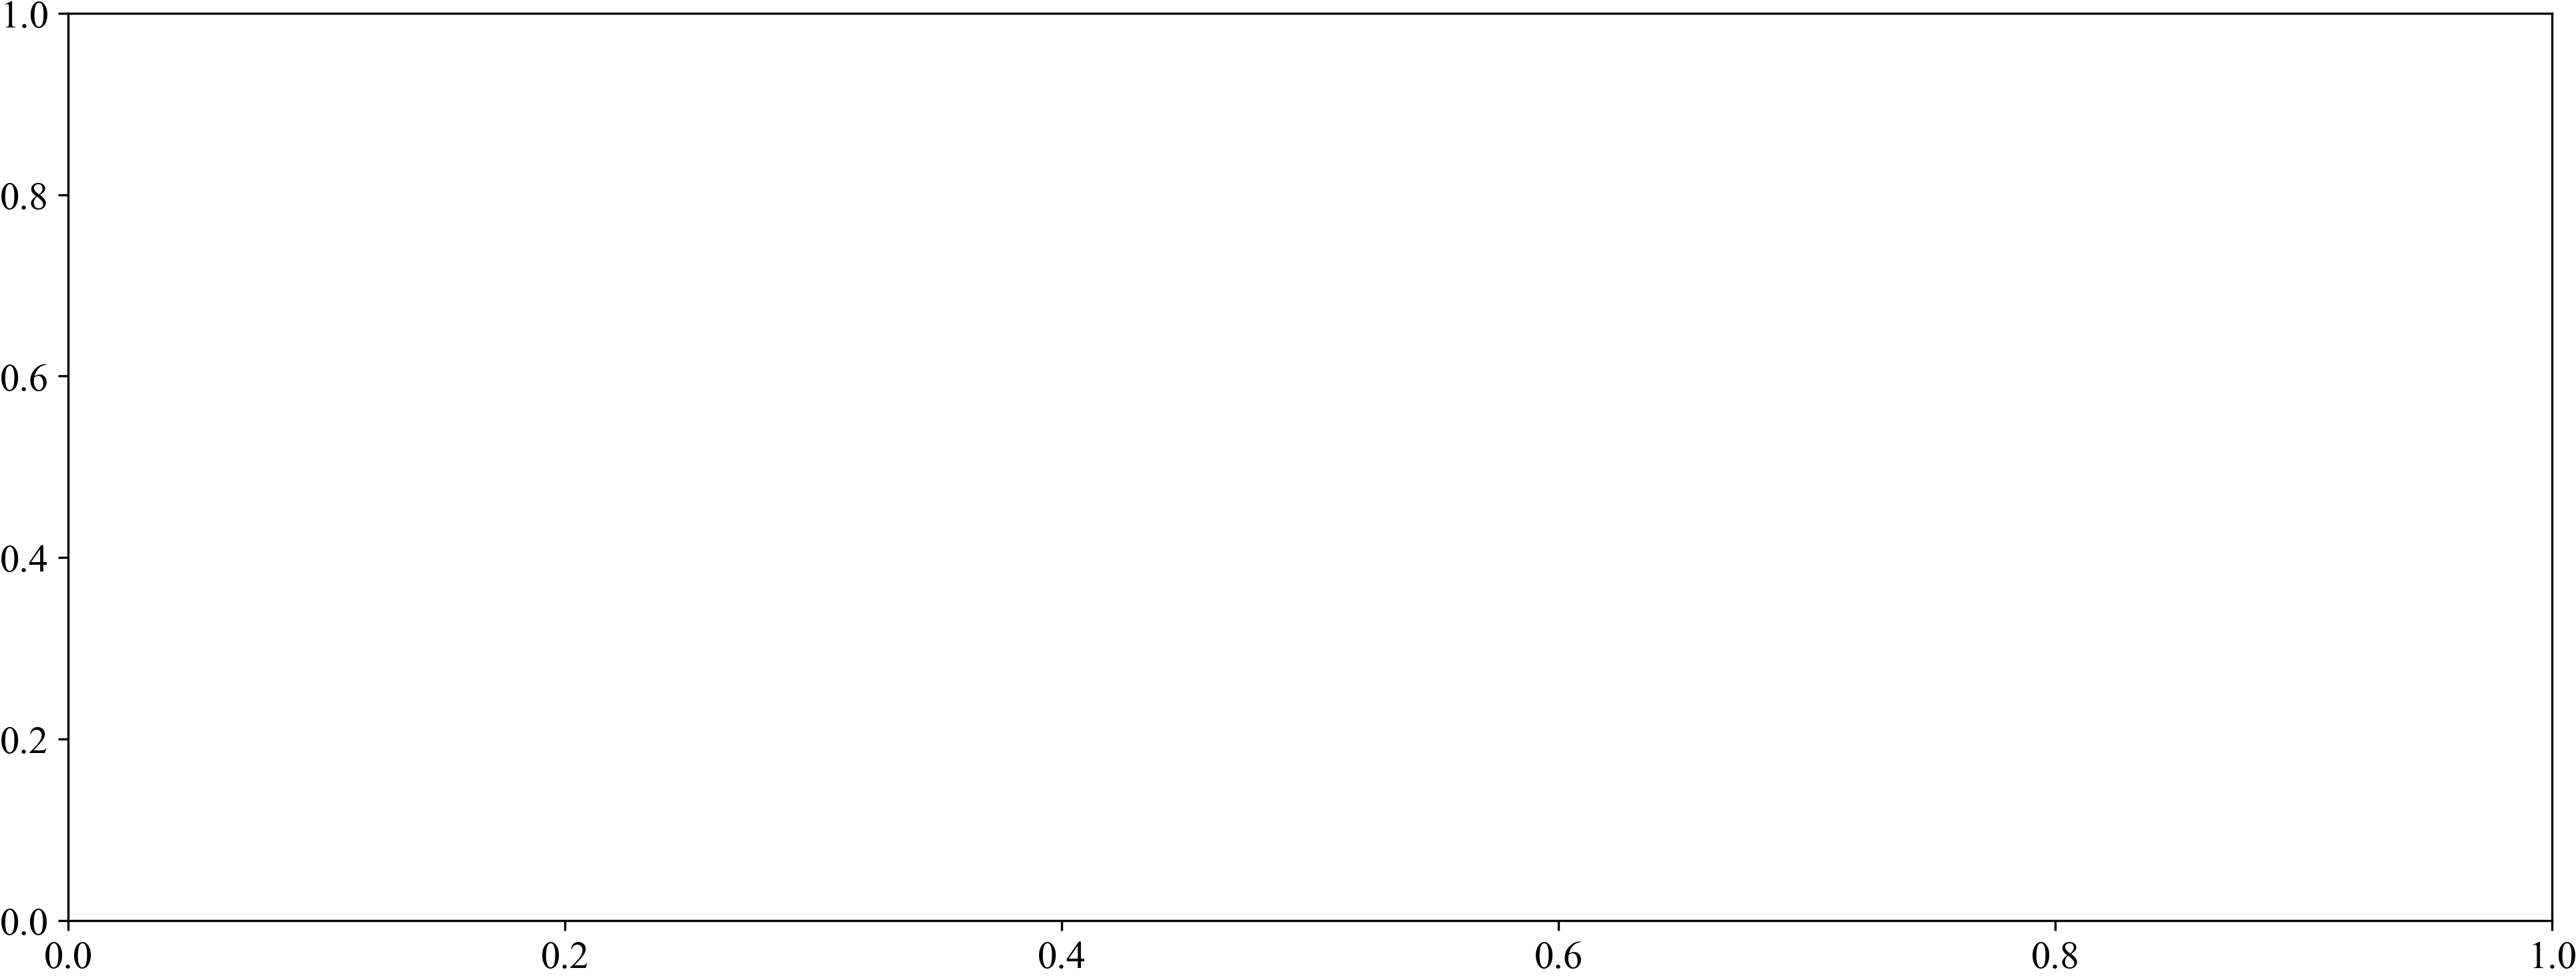

In [48]:
for year in range(2015, 2022):

    datestart = datetime.datetime(year, 1, 1)
    dateend = datetime.datetime(year, 12, 31)

    fig = plt.figure(figsize=(16, 6))
    ax = plt.subplot(111)

    fname = os.path.basename(datafilelist[1]).split(".")[0] + "_" + str(year) + ".jpg"

    dates, wind = cmts.read_wind_dates(datafilelist[1])

    ax.plot(dates[gooddates], wind[gooddates], "k-")

    ax.set_xlim(datestart, dateend)
    ax.set_ylim(0., 20.)
    ax.set_ylabel("Wind\nspeed\n(m/s)", rotation=0, ha="right")
    fig.autofmt_xdate()


    # plt.savefig(os.path.join(figdir, fname))

    plt.show()
    plt.close()

### 2.3 Specific month

In [10]:
def get_uv(wind, angle):
    anglerad = np.deg2rad(angle)
    u = -wind * np.sin(anglerad)
    v = -wind * np.cos(anglerad)
    return u, v

IR_TS_MO_6100196
(721, 3)
GL_TS_MO_6100002
(697, 28)


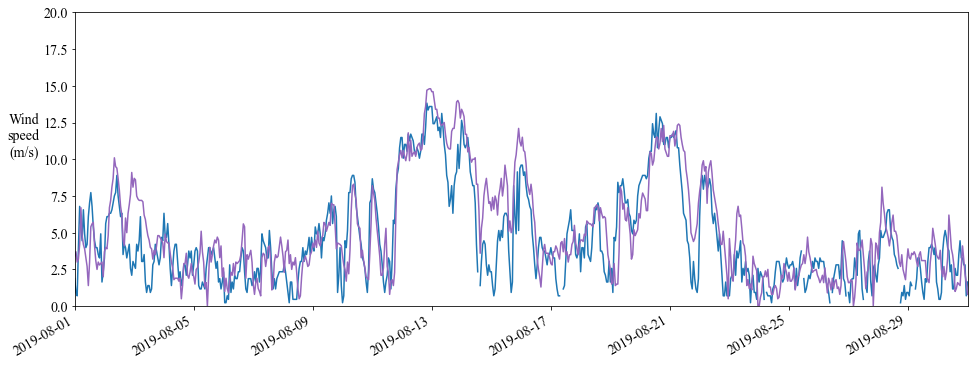

In [29]:
datestart = datetime.datetime(2019, 8, 1)
dateend = datetime.datetime(2019, 8, 31)

fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(111)

fname = "windcombined_201908.jpg"

for datafile in datafilelist:
    
    textleg = os.path.basename(datafile).split(".")[0]
    print(textleg)
    

    with netCDF4.Dataset(datafile) as nc:
        timevar = nc.get_variables_by_attributes(standard_name="time")[0]
        lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
        lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
        depth = nc.get_variables_by_attributes(standard_name="depth")[0][:]
        dates = netCDF4.num2date(timevar[:], timevar.units, only_use_cftime_datetimes=False)
        wind = nc.get_variables_by_attributes(standard_name="wind_speed")[0][:]
        angle = nc.get_variables_by_attributes(standard_name="wind_from_direction")[0][:]

    # Compute u, v components
    gooddates = np.where((dates <= dateend) & (dates >= datestart))[0]    
    print(wind[gooddates].shape)
    ax.plot(dates[gooddates], wind[gooddates], label=textleg)

ax.set_xlim(datestart, dateend)
ax.set_ylim(0., 20.)
ax.set_ylabel("Wind\nspeed\n(m/s)", rotation=0, ha="right")
fig.autofmt_xdate()


plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight", 
            transparent=False, facecolor=fig.get_facecolor())

plt.show()
plt.close()

### 2.4 Arrow time series

In [7]:
def add_legend(colordict, ax, loc=2, ncol=2, fsize=12, legtitle=None):
    """Add a legend on the current ax using the color dictionary,
    which related a text and a color.
    
    ## Example
    
    colordict = {"< 1%": "#ffffe5",
             "1-5%": "#f7fcb9",
             "5-10%": "#d9f0a3",
             "10-15%": "#addd8e",
             "15-20%": "#78c679",
             "20-30%": "#41ab5d",
             "30-40%": "#238443",
             "> 40%": "#005a32"
            }
    """
    for k, v in colordict.items():
        ax.plot(0., 0., "s", color=v, markersize=7, label=k)
    leg = plt.legend(loc=loc, fontsize=fsize, edgecolor="w", ncol=ncol)
    if legtitle is not None:
        leg.set_title(legtitle, prop={'size': fsize+2})

In [8]:
speeddict = {"< 3": "#ffffcc",
             "3-6": "#d9f0a3",
             "6-9": "#addd8e",
             "9-12": "#78c679",
             "12-15": "#31a354",
             "> 15": "#006837",
            }

def get_color_speed(speed):
    """
    Create an array of color based on the number of habitants
    """   

    if speed > 15:
        color = "#006837"
    elif speed > 12:
        color = "#31a354"
    elif speed > 9:
        color = "#78c679"
    elif speed > 6:
        color = "#addd8e"
    elif speed > 3:
        color = "#d9f0a3"
    else:
        color = "#ffffcc"
            
    return color

#### Read wind and compute components

In [13]:
datafilelist

['../../data/CMEMS/IR_TS_MO_6100196.nc',
 '../../data/CMEMS/GL_TS_MO_6100002.nc']

In [24]:
datafile = datafilelist[0]

with netCDF4.Dataset(datafile) as nc:
    timevar = nc.get_variables_by_attributes(standard_name="time")[0]
    timesss = timevar[:]
    lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
    lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    depth = nc.get_variables_by_attributes(standard_name="depth")[0][:]
    dates = netCDF4.num2date(timevar[:], timevar.units, only_use_cftime_datetimes=False)
    wind = nc.get_variables_by_attributes(standard_name="wind_speed")[0][:,0]
    angle = nc.get_variables_by_attributes(standard_name="wind_from_direction")[0][:,0]
    T = nc.get_variables_by_attributes(standard_name="sea_water_temperature")[0][:,0]
    wmocode = nc.wmo_platform_code

# Compute u, v components
gooddates = np.where((dates <= dateend) & (dates >= datestart))[0]    
u, v = get_uv(wind[gooddates], angle[gooddates])

In [25]:
speed = np.sqrt(u * u + v * v)
speed.max()

/tmp/ipykernel_106498/1718667127.py:1: RuntimeWarning: invalid value encountered in sqrt
  speed = np.sqrt(u * u + v * v)


13.820000656414777

/home/ctroupin/Software/PythonEnvs/twitter-data/lib/python3.10/site-packages/matplotlib/dates.py:435: UserWarning: Warning: converting a masked element to nan.
  d = np.asarray(d)


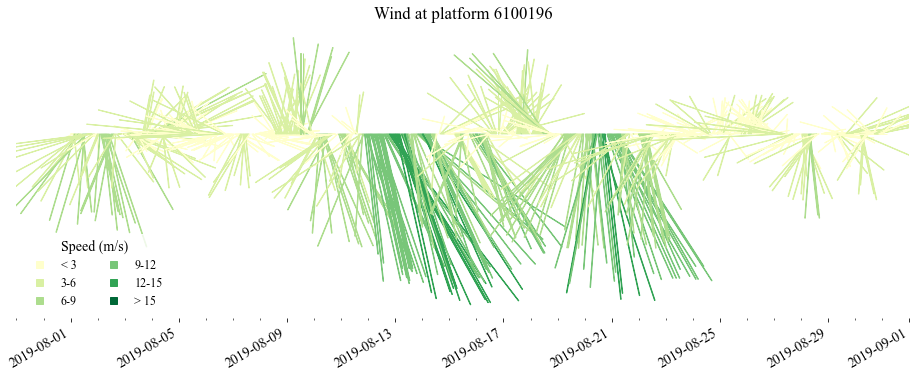

In [26]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(111)

fname = os.path.basename(datafile).split(".")[0] + "_feather.jpg"

add_legend(speeddict, ax, loc=3, ncol=2, legtitle="Speed (m/s)")
ax.plot(dates[gooddates], np.zeros(len(gooddates)), "wo", ms=.001)

for ii in range(0, len(gooddates)):
    # rgba_color = cmocean.cm.speed(norm(wind[gooddates[ii]])) 

    rgba_color = get_color_speed(wind[gooddates[ii]])
    normspeed = np.sqrt(u[ii] * u[ii] + v[ii] * v[ii])
    ax.arrow(dates[gooddates[ii]], 0, u[ii], v[ii], 
             color=rgba_color, 
             head_width=0., head_length=0., width=0.02)

ax.set_xlim(datestart - datetime.timedelta(days=2), dateend + datetime.timedelta(days=1))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.set_yticks([])
plt.title(f"Wind at platform {wmocode}")
fig.autofmt_xdate()

plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight", 
            transparent=False, facecolor=fig.get_facecolor())
plt.show()
plt.close()

### 2.5 Arrow with color depending on temperature

In [58]:
norm = mpl.colors.Normalize(vmin=21., vmax=26.)
cmap = cmocean.cm.thermal
cmap = plt.cm.RdYlBu_r

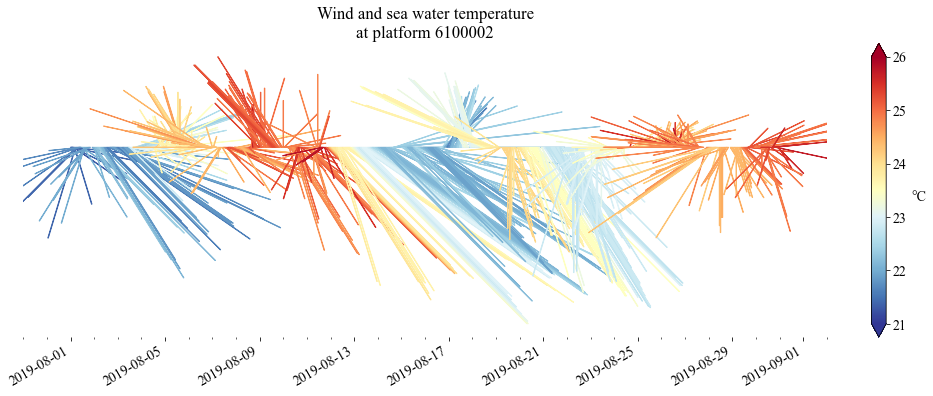

In [67]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(111)

fname = os.path.basename(datafile).split(".")[0] + "_feather_temperature.jpg"

ax.plot(dates[gooddates], np.zeros(len(gooddates)), "wo", ms=.001)

for ii in range(0, len(gooddates)):
    rgba_color = cmap(norm(T[gooddates][ii]))
    ax.arrow(dates[gooddates[ii]], 0, u[ii], v[ii], 
             color=rgba_color, 
             head_width=0., head_length=0., width=0.02)

ax.set_xlim(datestart - datetime.timedelta(days=2), dateend + datetime.timedelta(days=2))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
plt.title(f"Wind and sea water temperature\nat platform {wmocode}")
fig.autofmt_xdate()

cb = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax=ax, pad=.05, extend='both', fraction=0.05)
cb.set_label("°C", ha="left", rotation=0)

ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight", 
            transparent=False, facecolor=fig.get_facecolor())
plt.show()
plt.close()